### Create Input Embeddings
#### words --> token --> Vector Embeddings

- d_model: The dimensionality of the embeddings, which is also the model's dimension for processing these embeddings.
- vocab_size: The size of the token vocabulary, ensuring each token has a corresponding embedding
## Workflow of the Code
When a tokenized input (e.g., [2, 5, 8]) is passed through the embedding layer: Each token index is used to look up its corresponding row in the embedding matrix.
For example:
- If the vocabulary has 10,000 tokens (vocab_size=10,000) and the d_model=512, the embedding matrix will have the shape [10,000, 512].
- Token index 2 retrieves the 2nd row from this matrix, producing a vector of size 512.
- ### Embeddings are Row Vectors


In [ ]:
import torch
import torch.nn as nn
import math

class InputEmbeddings(nn.module):
# d model is the dimension of the model
# vocab size is the size of the vocabulary
    def __init__(self, d_model:int ,vocab_size:int):
        super().__init__()
        self.d_model =d_model
        self.vocab_size=vocab_size
        self.embedding =nn.Embedding(vocab_size,d_model)
        # created 
    def forward(self ,x):
        return self.embedding(x) * math.sqrt(self.d_model)

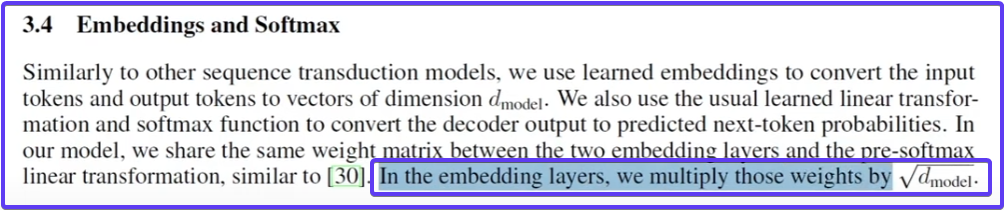

#### words --> token --> Vector Embeddings --> Positional Encoding
Since the Transformer model is permutation-invariant (it treats input sequences as a "set"), it lacks inherent knowledge of the order of tokens. The positional matrix solves this problem by embedding information about a token's position in the sequence.

Positional Embedding has the sam dimensions as vector embeddigs
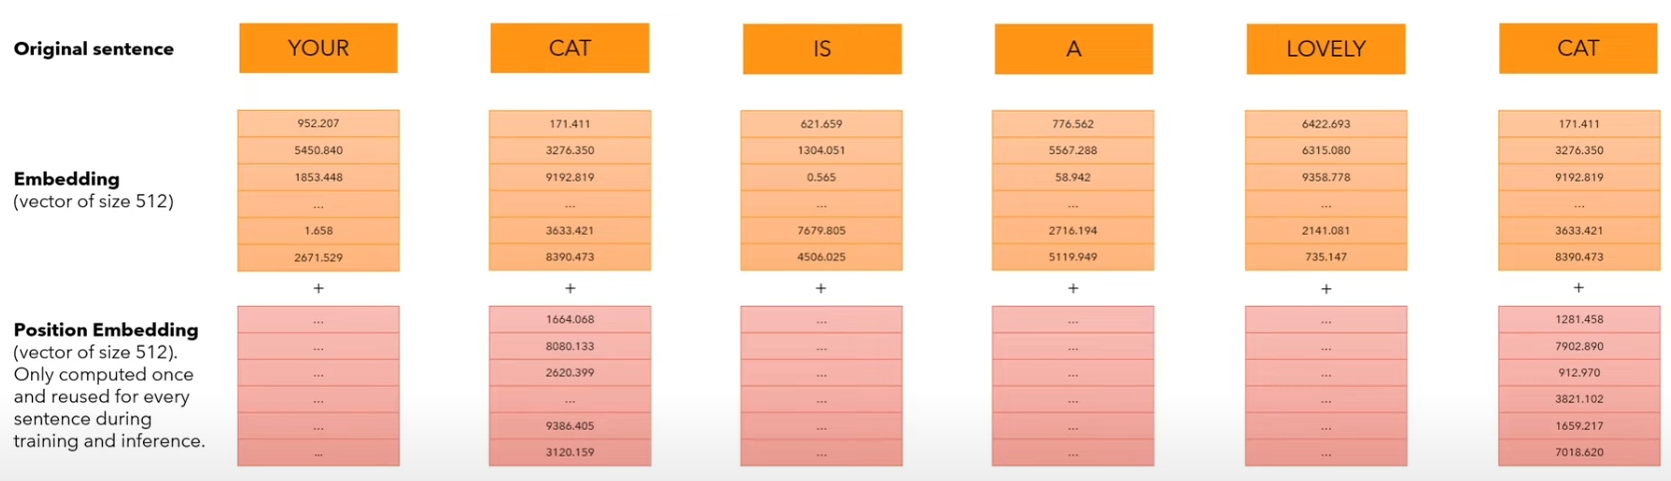

In [ ]:
class PositionalEncoding(nn.module):
    def __init__(self,d_model:int, seq_len:int,dropout:float):
        super()._init__()
        self.d_model=d_model
        self.seq_len=seq_len
        self.dropout=nn.Dropout(dropout)
        # Dropout sets the weight of outliers to zero so that overfitting does not occur
        # Create a matrix Of shape (seq_len, d_model)
        pe=torch.zeros(seq_len,d_model)
        # Create a vector of shape (Seq_Len, I)
        position=torch.arange(0, seq_len, dtype=torch.float). unsqueeze(1)
        div_term=torch.exp(torch.arange(0,d_model,2).float(*(-math.log(10000)/d_model)))
        #Apply the sin to even positions
        pe[:,0::2]=torch.sin(position*div_term)
        pe[:,1::2]=torch.cos(position*div_term)
        pe =pe.unsqueeze(0) #(1.seq_len_d_model)
        self.register_buffer('pe',pe)
    def forward(self,x):
        x=x+(self.pe[:,:x.shape[1],:]).requires_grad_(False)
        # Positional Encodings don't need to be tracked as the y are fixed values
        return self.dropout(x)


---

### **Why is the Matrix Size `d_model x seq_length`?**
1. **Matrix Dimensions:**
   - **`d_model` (Embedding Dimension):**
     - Represents the size of the vector space for each token embedding.
     - Ensures that positional information matches the dimensions of the token embeddings. This allows for seamless addition of the positional encoding to the token embeddings during training.
   - **`seq_length` (Sequence Length):**
     - Represents the number of tokens in a sequence.
     - Ensures there is a unique positional encoding for each position in the sequence.

2. **Overall Matrix Layout:**
   - Each column corresponds to a specific position in the sequence.
   - Each row represents one of the `d_model` dimensions, encoding different aspects of positional information.

---

### **How is the Positional Matrix Constructed?**
One popular method for creating positional encodings is **sinusoidal encoding**, which uses sine and cosine functions of different frequencies:

#### Formula:
\
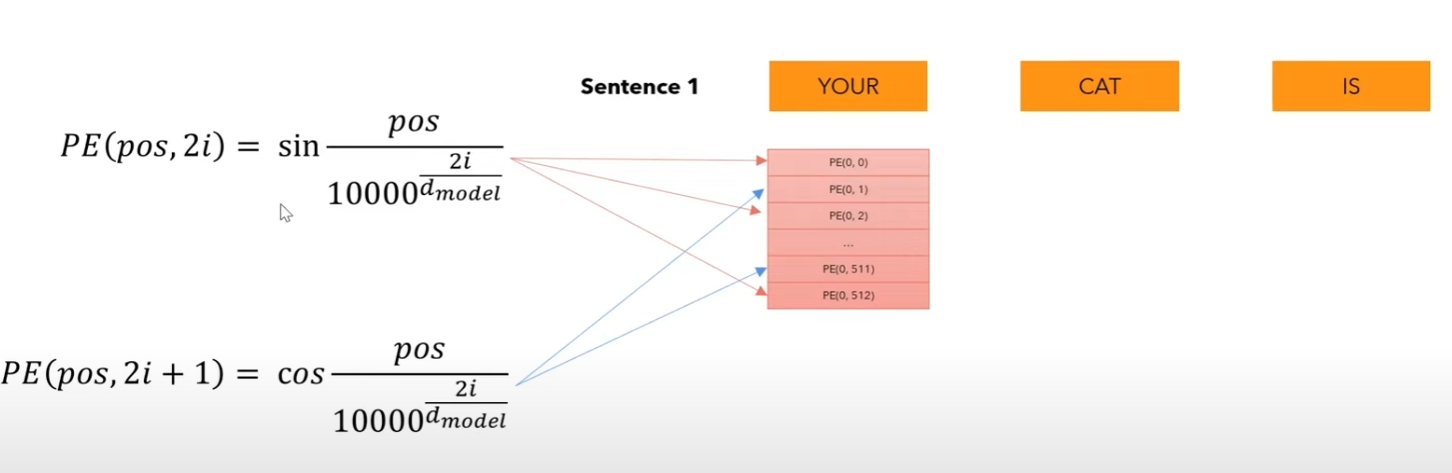
- **`pos`**: Position in the sequence (0 to `seq_length - 1`).
- **`i`**: Dimension index (0 to `d_model - 1`).
- **Sine/Cosine**: Different frequencies ensure unique encoding for each position.

#### Why Sinusoidal?
- The sine and cosine functions provide smooth, continuous changes across positions, making it easy for the model to learn positional relationships.
- Allows extrapolation to longer sequences not seen during training (generalization).

---

### **Practical Example:**
For a sequence of 5 tokens (`seq_length = 5`) and embeddings of size 4 (`d_model = 4`), the positional matrix would look like:

\[
PE = 
\begin{bmatrix}
\sin(0) & \cos(0) & \sin(0) & \cos(0) \\
\sin(1) & \cos(1) & \sin(1/10) & \cos(1/10) \\
\sin(2) & \cos(2) & \sin(2/10) & \cos(2/10) \\
\sin(3) & \cos(3) & \sin(3/10) & \cos(3/10) \\
\sin(4) & \cos(4) & \sin(4/10) & \cos(4/10)
\end{bmatrix}
\]

---

### **How Does This Help the Model?**
- The matrix is **added** to the token embeddings.
- The positional encodings ensure that the model can distinguish between tokens based on their position, enabling it to capture both semantic and order-based information in the sequence.

Would you like code to generate a sinusoidal positional matrix?

## Layer Normalization

In [ ]:
class LayerNormalization(nn.Module):  
    def __init__(self, eps:float=10**-6):
        super().__init__()
        self.eps=eps
        self.alpha=nn.Parameter(torch.ones(1))
        self.bias=nn.Parameter(torch.zeros(1))
    def forward(self,x):
        mean=x.mean(dim =-1,keepdim =True)
        std=x.std(dim=-1,keepduim=True)
        return self.alpha *(x-mean)/(std+self.eps)+Self.bias
    
